In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#For codespace, working in college
df = pd.read_csv("/workspaces/DJS-compute-tasks/Task 1/Data/listings_data.csv")
#df = pd.read_csv("/home/smayan/Desktop/DJS-compute-tasks/DJS-compute-tasks/Task 1/Data/listings_data.csv")


In [3]:
# For convenient viewing of the data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head(7)

,listing_id,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0


In [5]:
df.drop('listing_name', axis=1, inplace=True)

* **Here listing name isnt giving us any necessary information that cant be achieved from the host id, it is safe to drop it**

In [6]:
df.shape

(48895, 15)

In [7]:
host_names = df['host_name'].unique()

In [8]:
print(host_names)

['John' 'Jennifer' 'Elisabeth' ... 'Abayomi' 'Alberth' 'Ilgar & Aysel']


In [9]:
#for name in host_names:
    #print(name)

John
Jennifer
Elisabeth
LisaRoxanne
Laura
Chris
Garon
Shunichi
MaryEllen
Ben
Lena
Kate
Laurie
Claudio
Alina
Allen & Irina
Jane
Doti
Adam And Charity
Sing
Chaya
Lisel
Nathalie
Gregory
Claude & Sophie
Tommi
Shon
Dana
Ssameer Or Trip
Teri
Andrea
Angela
Vt
Tyrome
Harriet
Edward
Abdul
Yolande
Cyn
Earl
Rana
Orestes
Adreinne
Alexander
JT And Tiziana
Joya
James
Jeanne
Francesca
Joanna
Bianca
Luiz
Ted
Cristina
Petra
D
Dimitri
Patricia
Mark
Sara
Reka
Daniel
Casey
Robin
Anna
Enzo
Tye And Etienne
George
Josh
Victoria
Justin
Blaise
DAVID And RICK
Lulú
Sybilla
JoLynn
Gaia
Ana
Maggie
Starlee
Pas
Augustin
Sean & Lynette
Erica
Tracy
Christiana
Elliott
Olan
Shelly
Annette
Meka
Ann
Seth
Brenda
Erik
Dena
Jessica
Sally
Dani
Bruce
Nimo
Alexandra
Stacy
Evelyn
Emma
Vero
Sylvie
Jen
Kay
Jo
Lisa
Fernando And Lenin
Laurine
Uli
Sol
Cs
Lara
Tom
Sunder
Waldemar
Khem
Sahr
Ali+Scott
Sarah
Fredah
Katherine
Ming
Paula
Obed
Karen
Michael
White
Paz
Irene
Karene
Viviana
Marie
Gus
Myung
Renée
Henry
Sylvia
Syl
Lorenzo
Newyor

* **Had to do allat cuz wasnt able to see all from pandas output.**

In [10]:
df['host_name'].duplicated().unique()

array([False,  True])

In [11]:
df['listing_id'].duplicated().unique()

array([False])

* **Here it isnt a bad idea to drop host_names but since our dataset is fairly small, just 15 columns at the end of this, its fine to keep it as an extra point, it wont be of use for model training but might be needed if one needs to find name of the host from the id given.
Thus since this is a small dataset, host name isnt being dropped**

In [12]:
df.head(5)

,listing_id,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [13]:
df.shape

(48895, 15)

In [14]:
df.dtypes

listing_id                int64
host_id                   int64
host_name                object
borough                  object
area                     object
latitude                float64
longitude               float64
room_type                object
price (in dollars)        int64
minimum_stay              int64
no_of_reviews             int64
last_review_date         object
reviews_per_month       float64
host_listing_count        int64
booking_availability      int64
dtype: object

* **There are certain features which can be improved if they are str**

In [15]:
columns = ['host_name','borough','area','room_type']
# for col in columns:
df[columns] = df[columns].astype(str)

* **Here longitude and latitude individually do not have much important but together they are useful so it is better to create a single column for them instead of having them as 2 features.**

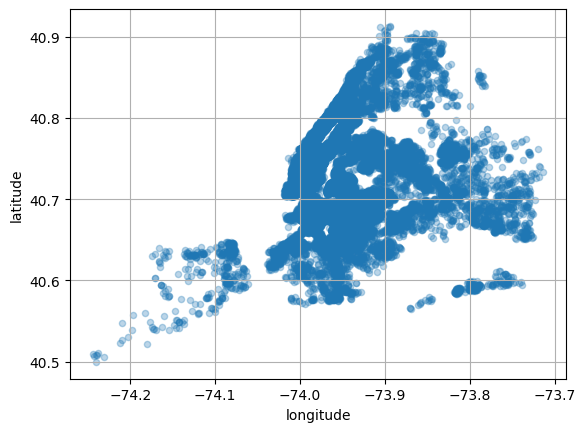

In [16]:
df.plot(kind = 'scatter' , x = 'longitude', y = 'latitude', grid = True, alpha =0.3)
plt.show();

* **Just gives a geographical map type visual on the locations.**

* **Code cell below is full gpt**

In [17]:
#from IPython.display import Image, display

# Path to the local image file
#image_path = '/home/smayan/Desktop/DJS-compute-tasks/DJS-compute-tasks/Task 1/Notebook/Untitled design.jpg'
#image_path = 'Task 1/Notebook/Untitled design.jpg'


# Display the image
#display(Image(filename=image_path))


* **Visible from here that the values of latitude and longitude and accurate.**

In [18]:
df.isnull().sum()

listing_id                  0
host_id                     0
host_name                   0
borough                     0
area                        0
latitude                    0
longitude                   0
room_type                   0
price (in dollars)          0
minimum_stay                0
no_of_reviews               0
last_review_date        10052
reviews_per_month       10052
host_listing_count          0
booking_availability        0
dtype: int64

* **Function to check null percentage , inspiration taken from bootcamp code.**

In [19]:
columns_checking = ['last_review_date','reviews_per_month']

def null_pecentage(df, columns):
    result={}
    for col in columns:
        if col in df.columns:
            null_percentage = (df[col].isnull().sum() / len(df)) * 100
            result[col] = round(null_percentage, 2)
        else:
            result[col] = "Column not found"
    return result

null_percentage = null_pecentage(df, columns_checking)

for column, percentage in null_percentage.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")
    

last_review_date: 20.56%
reviews_per_month: 20.56%


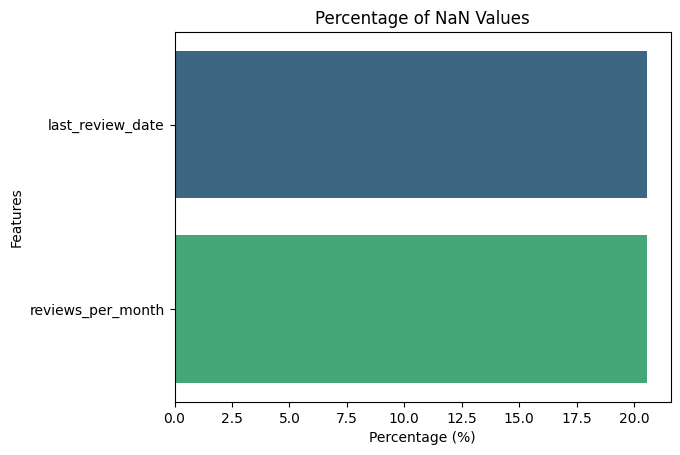

In [20]:
sns.barplot(data=null_percentage, x=null_percentage.values(), y=null_percentage.keys(), palette='viridis', hue=null_percentage.keys()).set(title="Percentage of NaN Values", xlabel="Percentage (%)", ylabel="Features")
plt.show()

* **It is unsure that the reviews_per_month is NaN because of no reviews for the hotel so for now filling it with placeholder : 0**

In [21]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [22]:
df['reviews_per_month'].isnull().sum()

np.int64(0)

In [23]:
df.head(5)

,listing_id,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [24]:
df[['LRDate','LRMonth', 'LRYear']]=df['last_review_date'].str.split('-', expand =True)
df.drop('last_review_date', axis=1,inplace=True)
df.head()

,listing_id,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,reviews_per_month,host_listing_count,booking_availability,LRDate,LRMonth,LRYear
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,19,10,2018
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,21,05,2019
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,NaN,NaN,NaN
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,05,07,2019
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,19,11,2018


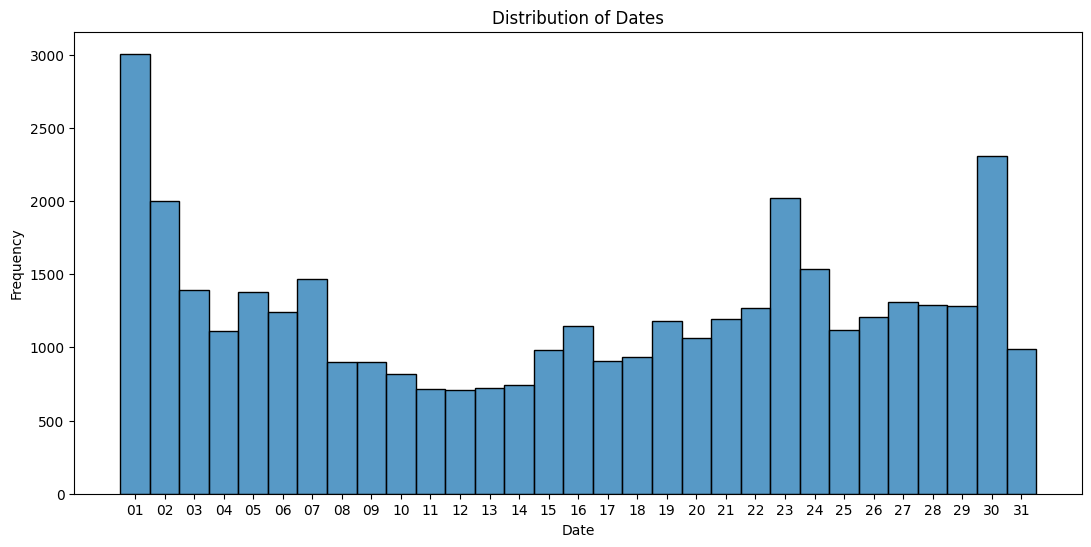

In [25]:
plt.figure(figsize=(13, 6))
dfnew = df.sort_values(by = 'LRDate')
sns.histplot(dfnew['LRDate'])  
plt.title('Distribution of Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()


* **Such multimodal data can be managed by binning in the data preprocessing phase.**

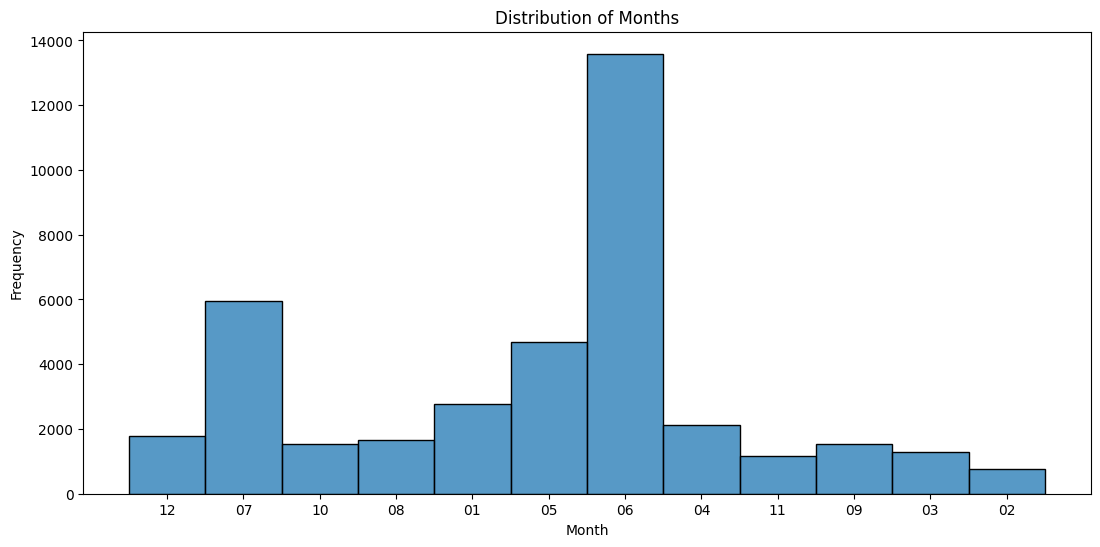

In [26]:
plt.figure(figsize=(13, 6))
dfnew = df.sort_values(by = 'LRDate')
sns.histplot(dfnew['LRMonth'])  
plt.title('Distribution of Months')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()


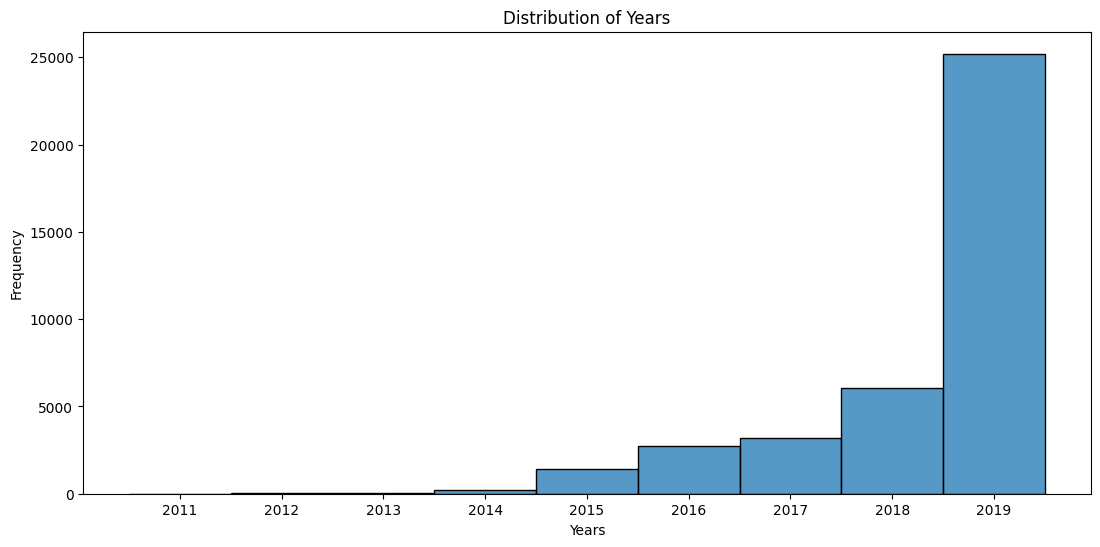

In [27]:
plt.figure(figsize=(13, 6))
dfnew = df.sort_values(by = 'LRYear')
sns.histplot(dfnew['LRYear'])  
plt.title('Distribution of Years')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()


* **From these graph, it filling null values with median values will be safe in these 3 columns.**

In [28]:
df.dtypes

listing_id                int64
host_id                   int64
host_name                object
borough                  object
area                     object
latitude                float64
longitude               float64
room_type                object
price (in dollars)        int64
minimum_stay              int64
no_of_reviews             int64
reviews_per_month       float64
host_listing_count        int64
booking_availability      int64
LRDate                   object
LRMonth                  object
LRYear                   object
dtype: object

In [29]:
# Wrong Method, Talked with Ananya and she explained how the NULL values correspond to no reviews and this should only be filled with a placeholder
# df['LRDate'] = pd.to_numeric(df['LRDate'], errors='coerce')
# df['LRMonth'] = pd.to_numeric(df['LRMonth'], errors='coerce')
# df['LRYear'] = pd.to_numeric(df['LRYear'], errors='coerce')
# df['LRDate'] = df['LRDate'].fillna(df['LRDate'].median())
# df['LRYear'] = df['LRYear'].fillna(df['LRYear'].median())
# df['LRMonth'] = df['LRMonth'].fillna(df['LRMonth'].median())
# df.shape

In [30]:
# df['LRDate'] = pd.to_datetime(df['LRDate'], errors='coerce')

# # Create bins based on year and rename column to 'LRYear'
# df['LRYear'] = df['LRDate'].dt.year

# # Calculate the mean 'LRDate' for each year
# means = df.groupby('LRMonth')['LRDate'].mean()

# # Function to fill missing values with the mean 'LRDate' of the corresponding year
# def fill_missing(row):
#     if pd.isnull(row['LRDate']):
#         return means[row['LRMonth']]
#     else:
#         return row['LRDate']

# # Apply the function to fill missing values1
# df['LRDate'] = df.apply(fill_missing, axis=1)


In [31]:
df['LRDate'] = df['LRDate'].fillna('1')
df['LRYear'] = df['LRYear'].fillna('1970')
df['LRMonth'] = df['LRMonth'].fillna('1')

* **Filling according to convention : 01-01-1970**

* **It is seen that date, month and year are objects, so now conversion to integer is done and null values are filled with mode values.**

 ###   **Keeping all the shitty code ahead commented so i remember how much better the method above is (god bless Aurelion Geron 💀🙏)**

In [32]:
# mode = int(df['LRMonth'].mode())
# df['LRMonth'] = df['LRMonth'].fillna(mode)
# # df.head(5)
# df['LRMonth'].unique()



In [33]:
# mode = df['LRDate'].mode()
# df['LRDate'] = df['LRDate'].fillna(mode)
# df.head(5)
# df['LRDate'].unique()   


In [34]:
# mode = int(df['LRYear'].mode())
# df['LRYear'] = df['LRYear'].fillna(mode)
# df.head(5)
# df['LRYear'].unique()


In [35]:
def convert_date(date):
    date_str = str(date)
    if len(date_str) == 2 and date_str.startswith('0'):
        return int(date_str[1:])  
    else:
        return date

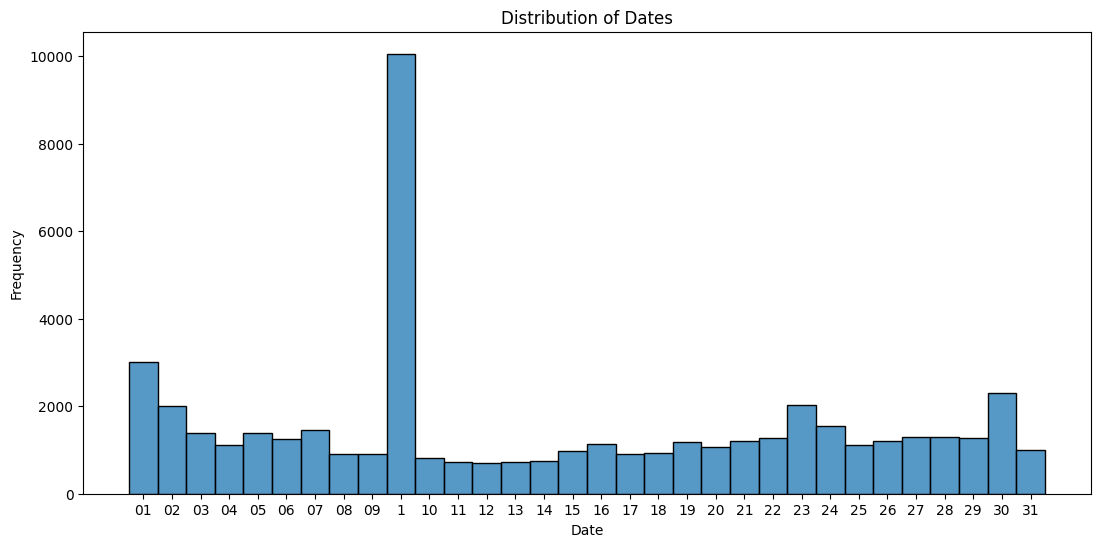

In [36]:
plt.figure(figsize=(13, 6))
dfnew = df.sort_values(by = 'LRDate')
sns.histplot(dfnew['LRDate'])  
plt.title('Distribution of Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()


* **This is so shit, i wanna learn to manage this type of data( many options and many nulls) better.**

* **Defining a function to solve the ambiguity of dates and months being : 07 or just 7.**

In [37]:
df['LRMonth'] = df['LRMonth'].apply(convert_date)
df['LRDate'] = df['LRDate'].apply(convert_date)

In [38]:
df.dtypes

listing_id                int64
host_id                   int64
host_name                object
borough                  object
area                     object
latitude                float64
longitude               float64
room_type                object
price (in dollars)        int64
minimum_stay              int64
no_of_reviews             int64
reviews_per_month       float64
host_listing_count        int64
booking_availability      int64
LRDate                   object
LRMonth                  object
LRYear                   object
dtype: object

In [39]:
df['LRDate'] = df['LRDate'].astype(int)
df['LRMonth'] = df['LRMonth'].astype(int)
df['LRYear'] = df['LRYear'].astype(int)

In [40]:
df.head(5)

,listing_id,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,reviews_per_month,host_listing_count,booking_availability,LRDate,LRMonth,LRYear
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,19,10,2018
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,21,5,2019
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,1,1,1970
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,5,7,2019
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,19,11,2018


In [41]:
df['price (in dollars)'].max()

np.int64(10000)

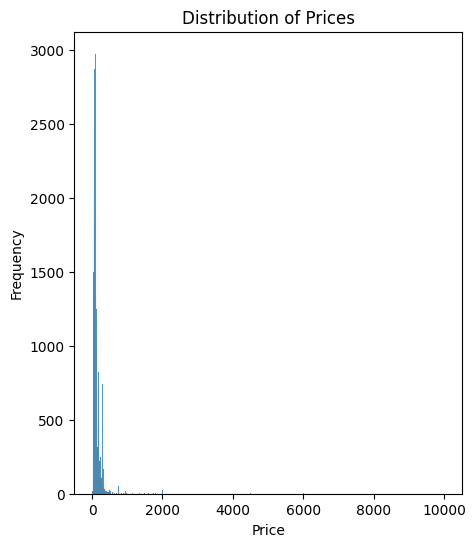

In [42]:
plt.figure(figsize=(5, 6))
dfnew = df.sort_values(by = 'price (in dollars)')
sns.histplot(dfnew['price (in dollars)'])  
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


* **This graph is showing that very few property prices do exist which are way more expensive then 2000$**

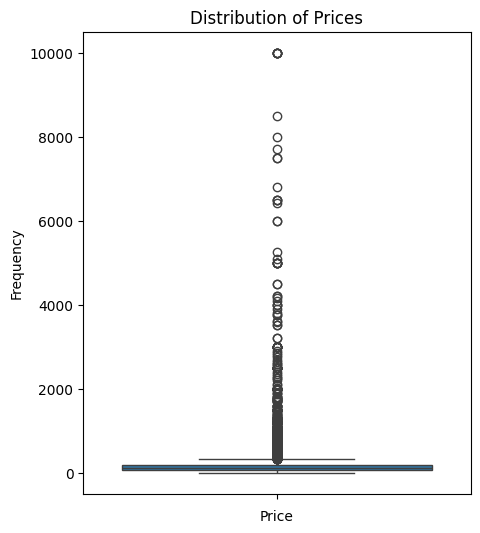

In [43]:
# Doubt : what even is this...
plt.figure(figsize=(5, 6))
dfnew = df.sort_values(by = 'price (in dollars)')
sns.boxplot(dfnew['price (in dollars)'])  
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


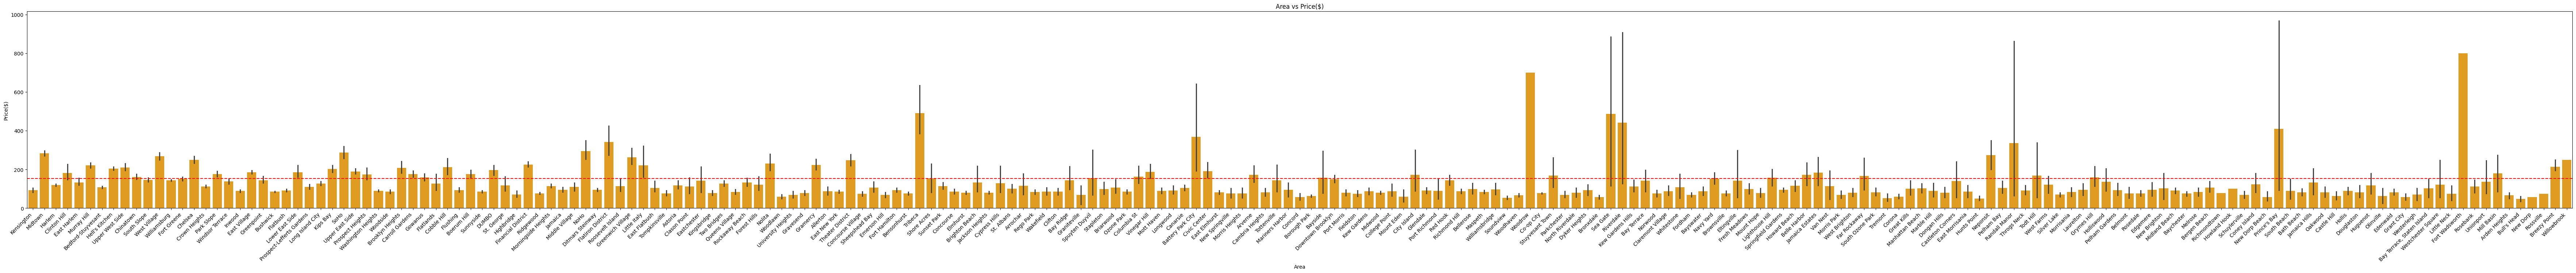

In [44]:
fig, ax = plt.subplots(figsize=(90, 7))

sns.barplot(x='area', y='price (in dollars)', data=df, color='orange')
plt.title('Area vs Price($)')
meanval = (df['price (in dollars)'].mean())
plt.axhline(meanval, color='r', linestyle='--', label='99%')
plt.xlabel('Area')
plt.ylabel('Price($)')
plt.xticks(rotation=45, ha='right')
plt.show()

* **There are a lot of areas but from this huge graph the inference possible is that the area of Midtown, Clinton Hill, Murray Hill, Hells' Kitchen, Upper West Side, West Village, Chelsea, Kips Bay, SoHo, Brooklyn Heights, Cobble Hill, Financial District, NoHo, Flatiron District, Greenwitch Village, Little Italy, Nolita, Theater DIstrict, Gramercy, Tribeca, Battery Park City, Woodrow, Sea Gate, Riverdale, Neponsit, Randall Manor, Prince's Bay, Fort Wadsworth and Willowbrook have relatively higher individual mean prices.**

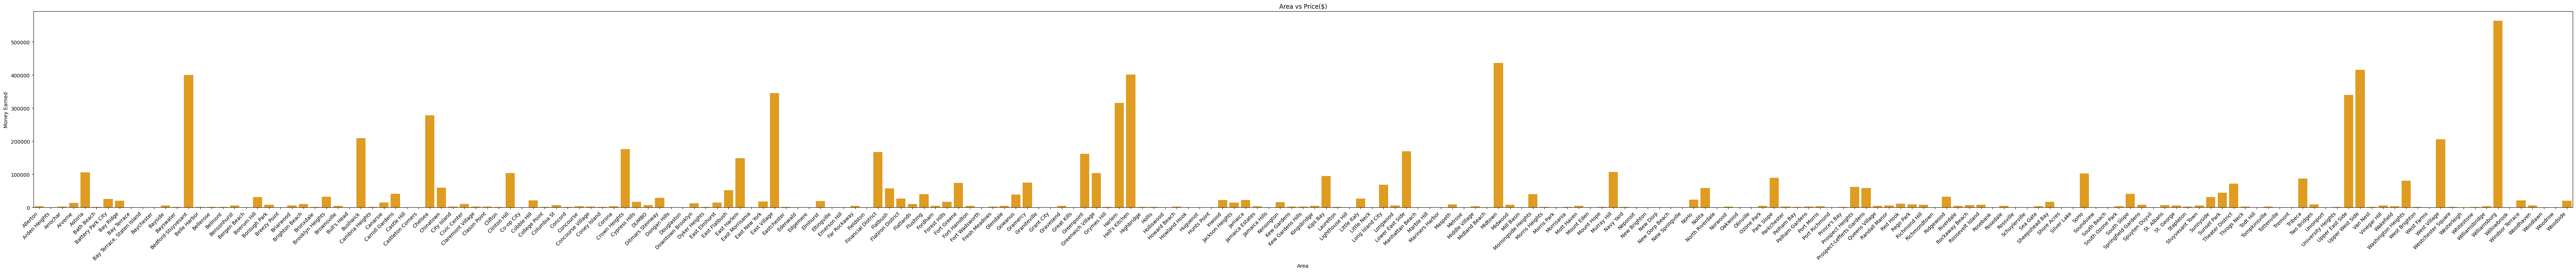

In [45]:
fig, ax = plt.subplots(figsize=(90, 7))
dfarea= df.groupby('area')['price (in dollars)'].sum().reset_index()
sns.barplot(x='area', y='price (in dollars)', data=dfarea, color='orange')
plt.title('Area vs Price($)')
plt.xlabel('Area')
plt.ylabel('Money Earned')
plt.xticks(rotation=45, ha='right')
plt.show()

* **From the above graph it is inferred that Astoria, Bedford-Stuyvesant, Bushwick, Chelsea, Crown Heights, Crown Heights, East Harlem, East Village, Financial District, Greenpoint, Greenwitch Village, Harlem, Hell's Kitchen, Midtown, Lower East Side, Upper East Side, Upper West Side, West Village, Williamsburg have the most value based on the number of properties and their prices**

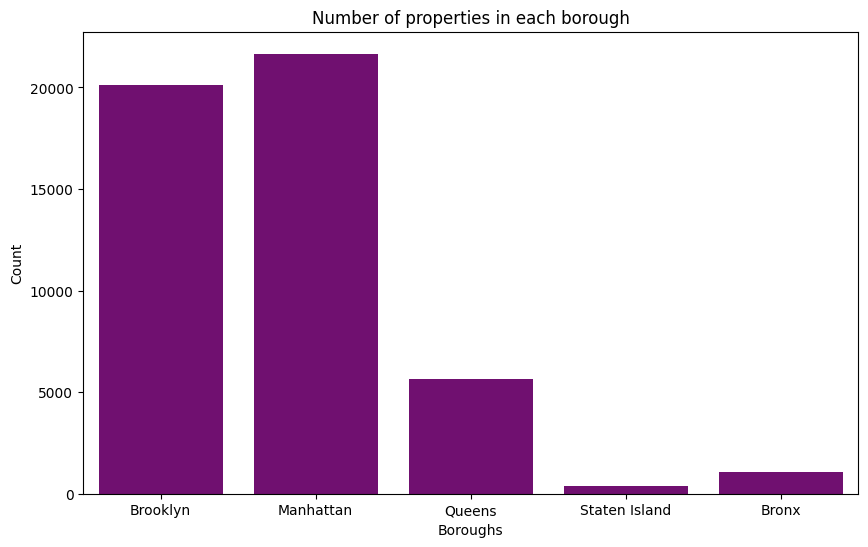

In [46]:
fig,ax = plt.subplots(figsize =(10,6))
sns.countplot(data = df, x = 'borough', color = 'purple')
plt.title("Number of properties in each borough")
plt.xlabel('Boroughs')
plt.ylabel('Count')
plt.show();

* **From the above graph the number of properties per borough in descending order is:** 
    1. Manhattan
    2. Brooklyn
    3. Queens
    4. Staten Island
    5. Bronx

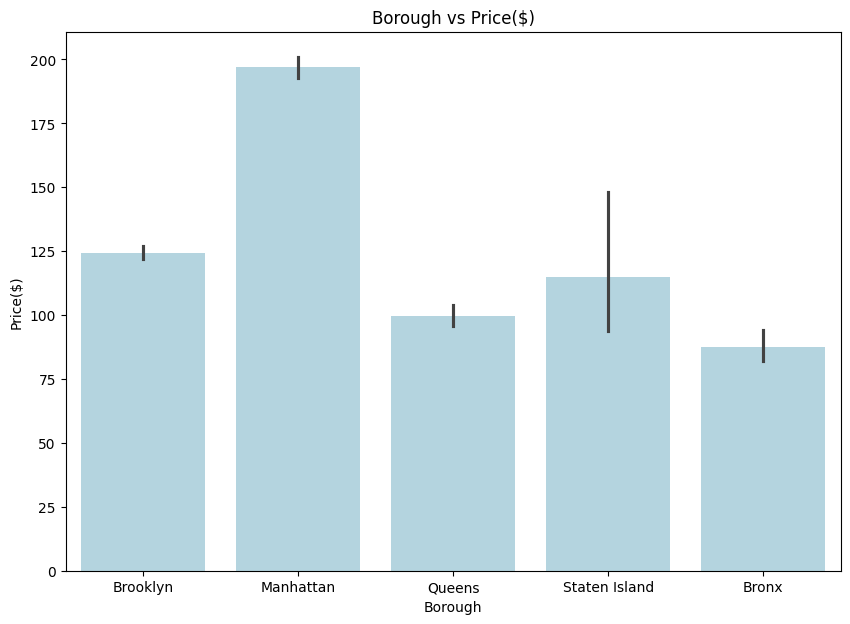

In [47]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.barplot(x='borough', y='price (in dollars)', data=df, color='lightblue')
plt.title('Borough vs Price($)')
plt.xlabel('Borough')
plt.ylabel('Price($)')
plt.show();

* **From the above graph the order for prices of property per borough in descending order is:** 
    1. Manhattan
    2. Brooklyn
    3. Staten Island
    4. Queens
    5. Bronx

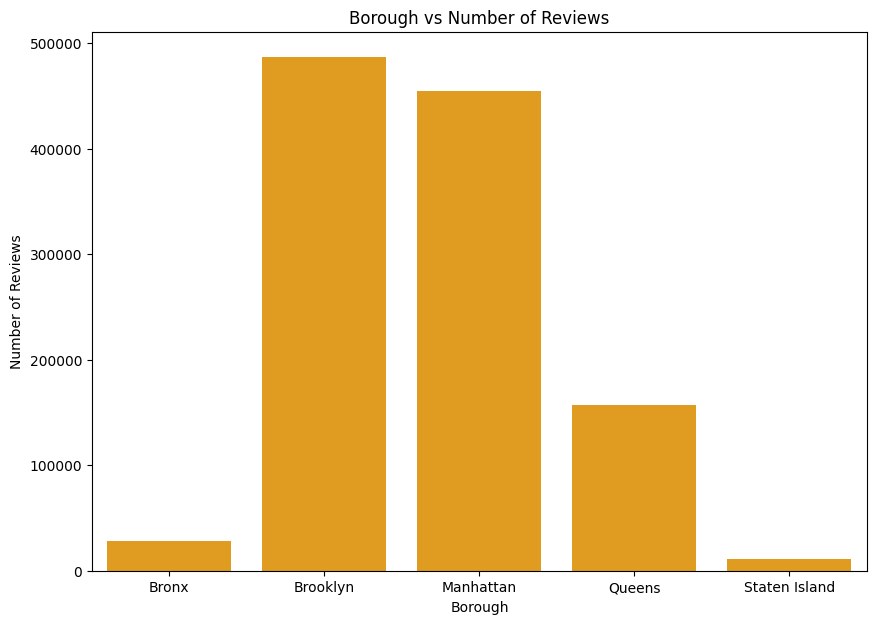

In [48]:
fig, ax = plt.subplots(figsize=(10, 7))
dfrew= df.groupby('borough')['no_of_reviews'].sum().reset_index()
sns.barplot(x='borough', y='no_of_reviews', data=dfrew, color='orange')
plt.title('Borough vs Number of Reviews')
plt.xlabel('Borough')
plt.ylabel('Number of Reviews')
plt.show()

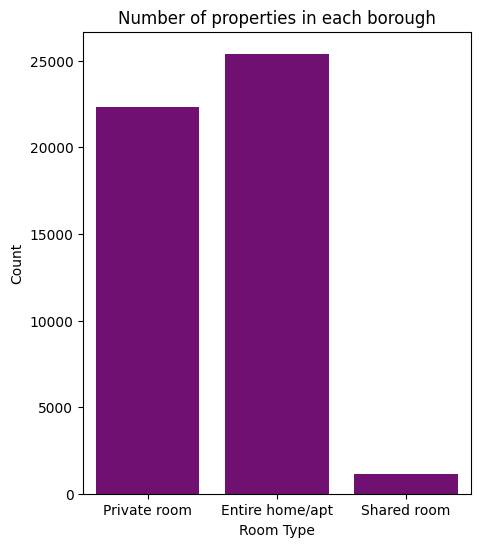

In [49]:
fig,ax = plt.subplots(figsize =(5,6))
sns.countplot(data = df, x = 'room_type', color = 'purple')
plt.title("Number of properties in each borough")
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show();

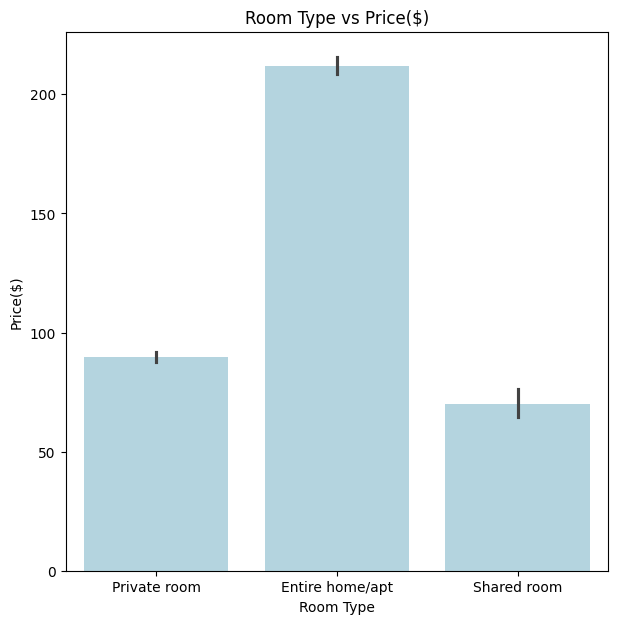

In [50]:
fig, ax = plt.subplots(figsize=(7, 7))

sns.barplot(x='room_type', y='price (in dollars)', data=df, color='lightblue')
plt.title('Room Type vs Price($)')
plt.xlabel('Room Type')
plt.ylabel('Price($)')
plt.show();

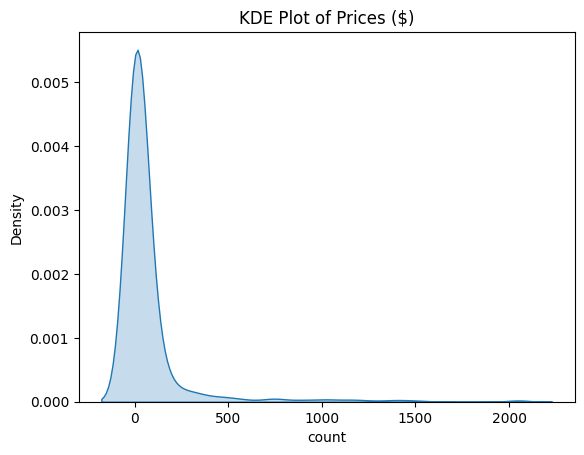

In [51]:
sns.kdeplot(df['price (in dollars)'].value_counts(), fill=True)
plt.title("KDE Plot of Prices ($)")
plt.show()

In [52]:
df['price (in dollars)'].mode()

0    100
Name: price (in dollars), dtype: int64

* **Here it is clearly seen that the prices till around 110 dollars are most common.**

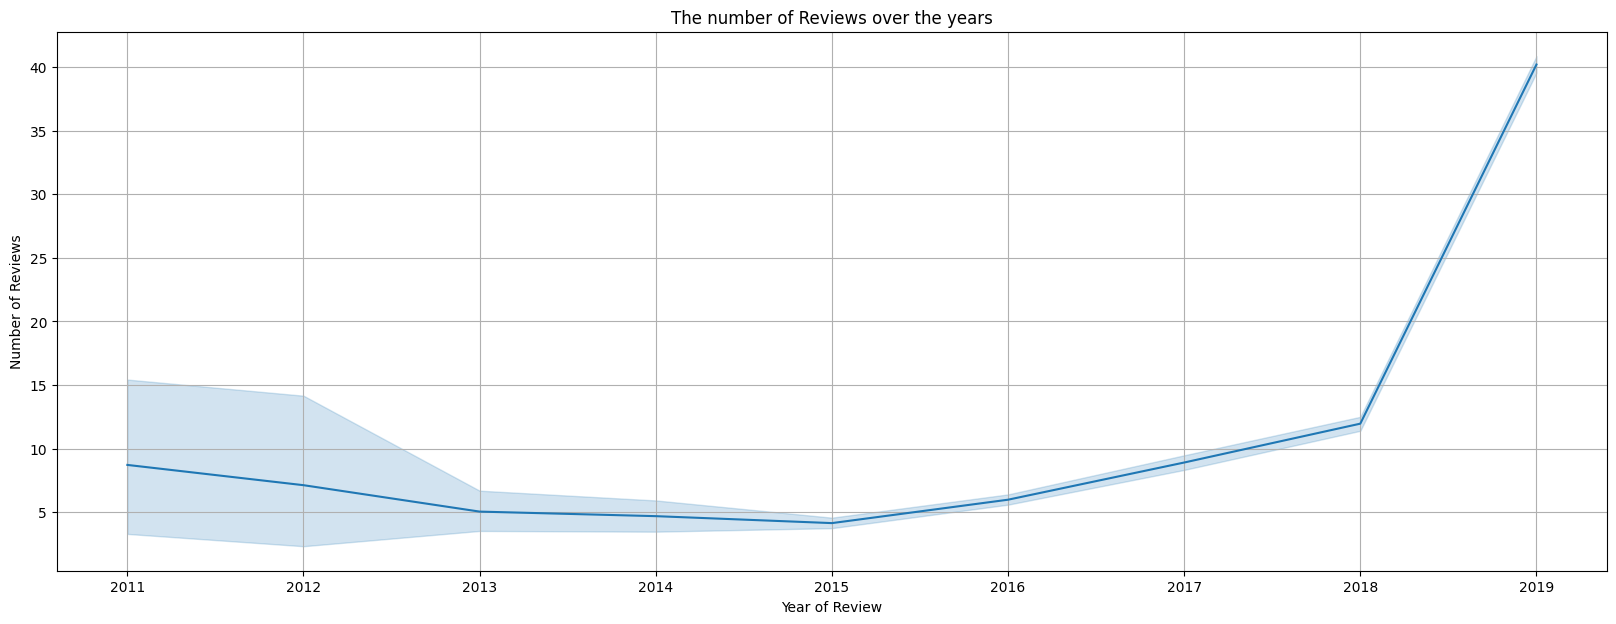

In [53]:
fig, ax = plt.subplots(figsize=(20, 7))
df_plot = df.sort_values(by='LRYear')
df_plot = df[df['LRYear']!=1970]
sns.lineplot(x='LRYear', y='no_of_reviews', data=df_plot)
plt.title('The number of Reviews over the years')
plt.xlabel('Year of Review')
plt.ylabel('Number of Reviews')
plt.grid(True)

* **From here it is visible that the mean of the number of reviews, and this the popularity of this platform has increased in the recent years.**

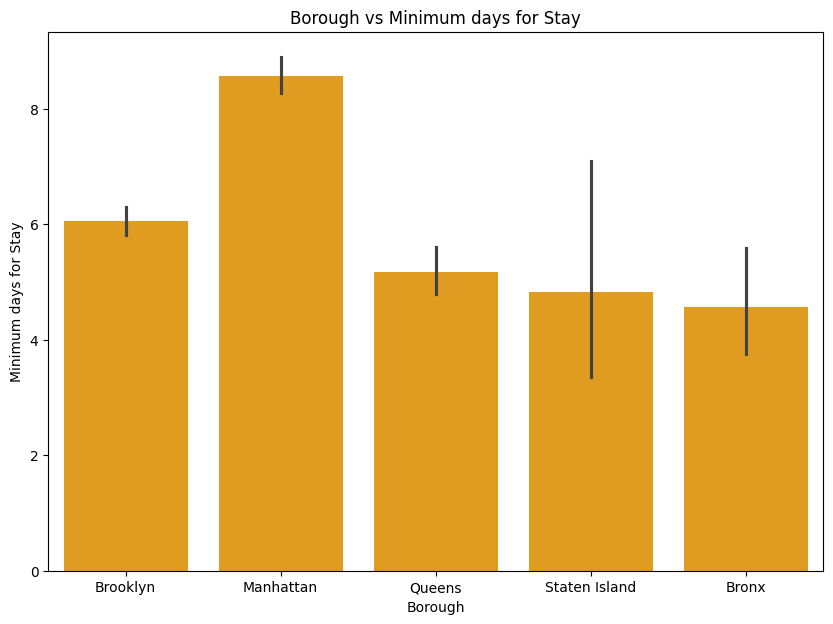

In [54]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.barplot(x='borough', y='minimum_stay', data=df, color='orange')
plt.title('Borough vs Minimum days for Stay')
plt.xlabel('Borough')
plt.ylabel('Minimum days for Stay')
plt.show()

In [55]:
df.isnull().sum()

listing_id              0
host_id                 0
host_name               0
borough                 0
area                    0
latitude                0
longitude               0
room_type               0
price (in dollars)      0
minimum_stay            0
no_of_reviews           0
reviews_per_month       0
host_listing_count      0
booking_availability    0
LRDate                  0
LRMonth                 0
LRYear                  0
dtype: int64